# Basic Reprojection Demo
In this notebook we go through a basic example showing how the reprojection can be run

In [1]:
from astropy.io import fits

from reprojection.reproject import calculate_reprojection
from create_test_data import create_test_fits_mini
from reprojection.utils import plot_wcs_comparison, compare_images


We use our `create_test_fits` function that creates some fake data with minorly different WCS

In [2]:
source_file, target_file = create_test_fits_mini()
source_hdu = fits.open(source_file)[0]
target_hdu = fits.open(target_file)[0]

/home/carterrhea/miniconda3/envs/reprojection/lib/python3.12/site-packages/astropy/wcs/wcsapi/fitswcs.py:366: UserWarning: 'WCS.all_world2pix' failed to converge to the requested accuracy.
After 20 iterations, the solution is diverging at least for one input point.
  warnings.warn(str(e))
/home/carterrhea/miniconda3/envs/reprojection/lib/python3.12/site-packages/astropy/wcs/wcsapi/fitswcs.py:366: UserWarning: 'WCS.all_world2pix' failed to converge to the requested accuracy.
After 20 iterations, the solution is diverging at least for one input point.
  warnings.warn(str(e))
/home/carterrhea/miniconda3/envs/reprojection/lib/python3.12/site-packages/astropy/wcs/wcsapi/fitswcs.py:366: UserWarning: 'WCS.all_world2pix' failed to converge to the requested accuracy.
After 20 iterations, the solution is diverging at least for one input point.
  warnings.warn(str(e))
/home/carterrhea/miniconda3/envs/reprojection/lib/python3.12/site-packages/astropy/wcs/wcsapi/fitswcs.py:366: UserWarning: 'WCS.al

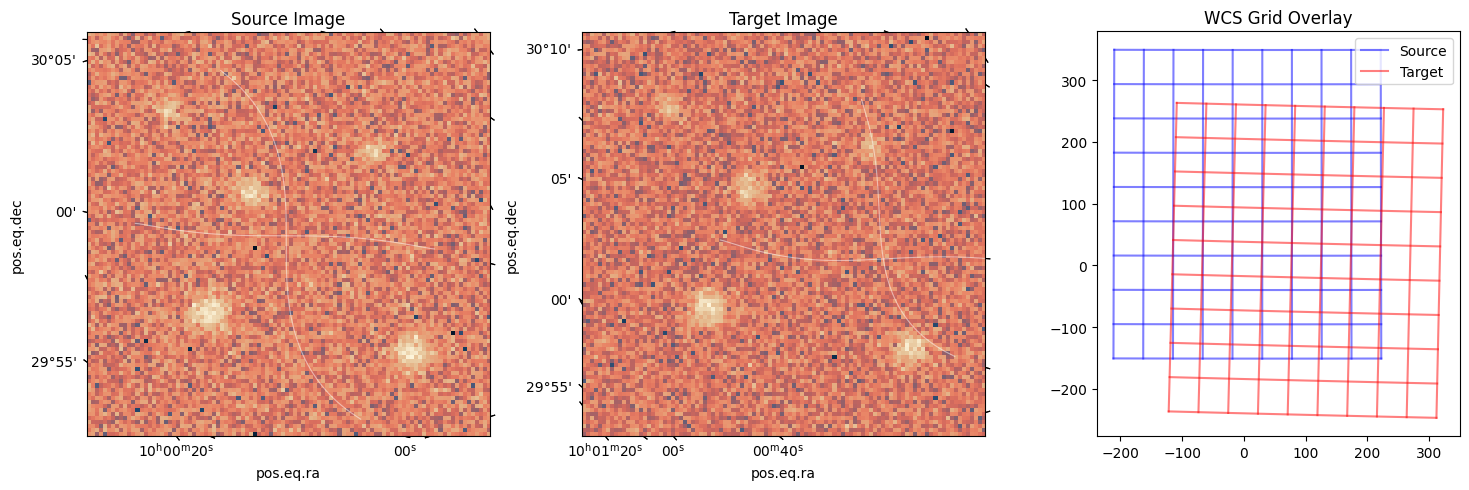

In [3]:
plot_wcs_comparison(source_hdu, target_hdu)

Now we can clearly visualize the image misalignment. Let's go ahead and run our reprojection code.

In [4]:
reprojected_source = calculate_reprojection(source_hdu, target_hdu)

tensor([[2.3838, 2.3886, 2.3933,  ..., 2.6018, 2.6019, 2.6019],
        [2.3874, 2.3921, 2.3968,  ..., 2.6041, 2.6042, 2.6043],
        [2.3909, 2.3957, 2.4003,  ..., 2.6064, 2.6065, 2.6066],
        ...,
        [2.5850, 2.5858, 2.5865,  ..., 2.7189, 2.7224, 2.7260],
        [2.5873, 2.5879, 2.5886,  ..., 2.7213, 2.7249, 2.7285],
        [2.5895, 2.5902, 2.5908,  ..., 2.7238, 2.7274, 2.7311]]) tensor([[0.2730, 0.2777, 0.2823,  ..., 0.4089, 0.4080, 0.4070],
        [0.2784, 0.2831, 0.2877,  ..., 0.4122, 0.4113, 0.4104],
        [0.2838, 0.2884, 0.2929,  ..., 0.4155, 0.4146, 0.4136],
        ...,
        [0.5941, 0.5938, 0.5933,  ..., 0.6087, 0.6104, 0.6122],
        [0.5972, 0.5967, 0.5963,  ..., 0.6115, 0.6133, 0.6151],
        [0.6002, 0.5998, 0.5993,  ..., 0.6144, 0.6162, 0.6181]])
Source coordinates ranges:
x_source: [-2339.414, 5454.076]
y_source: [-2334.439, 5441.981]


/home/carterrhea/Documents/reprojection/src/reprojection/reproject.py:233: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dec_0_rad = torch.deg2rad(torch.tensor(self.target_wcs.DEC_0, dtype=x_scaled.dtype))
/home/carterrhea/Documents/reprojection/src/reprojection/reproject.py:234: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ra_0_rad = torch.deg2rad(torch.tensor(self.target_wcs.RA_0, dtype=x_scaled.dtype))
/home/carterrhea/Documents/reprojection/src/reprojection/reproject.py:272: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ra_0_rad = to

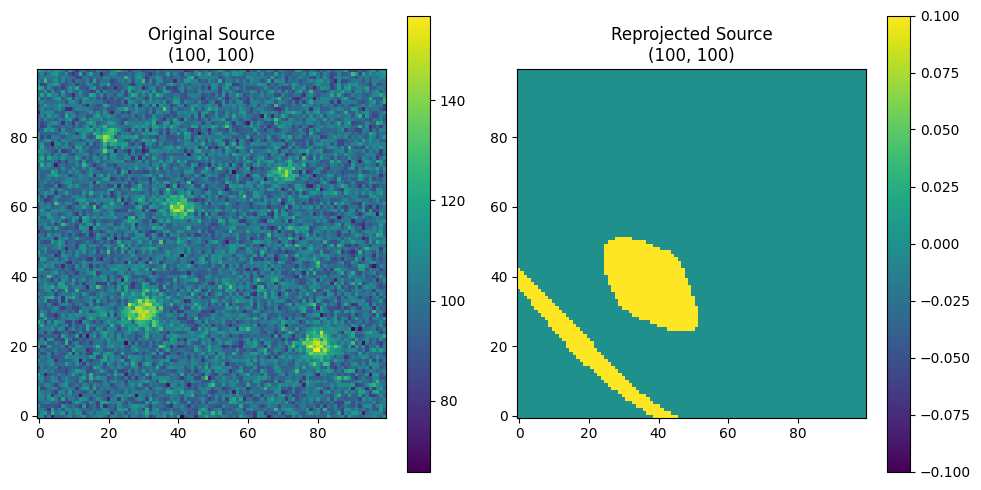

In [5]:
fig = compare_images(source_hdu, reprojected_source)